# Movie Reccomendation System



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data 
Import the four datasets to inspect and eventually combine into one dataframe for modeling.

The data is in the data folder:
* data/links.csv
* data/movies.csv
* data/ratings.csv
* data/tags.csv

###  Links dataframe

this dataframe will come in handy if we end up using additional data from imdb and the tmd for features in our model.

In [3]:
links = pd.read_csv('data/links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


### Movies DataFrame

this contains the title and genre of the movies. The movieId column matches with our links dataframe. For example movieId 1 matches  with movieId Toystory.  

In [82]:
movies = pd.read_csv('data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [83]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [84]:
#extract the year of film from the title using regex to extract the year
movies['year'] = movies.title.str.extract(r'(?:\((\d{4})\))?\s*$', expand=False)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


### Ratings DataFrame 

This dataframe contains userId, movieId, rating and a timestamp.

In [9]:
ratings = pd.read_csv('data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [72]:
ratings.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [86]:
ratings.movieId.value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: movieId, Length: 9724, dtype: int64

### Tags DataFrame

The tags dataframe has userId, movieId, tag and timestamp

In [11]:
tags = pd.read_csv('data/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [12]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


Tags may be an important feature we will want to explore the tags and see if we can pinpoint some of the most used tags to add to our data

In [22]:
#tag value counts
tags.tag.value_counts()

In Netflix queue      131
atmospheric            36
superhero              24
thought-provoking      24
funny                  23
                     ... 
Stand Up                1
independent             1
bombs                   1
Great performances      1
American Indians        1
Name: tag, Length: 1589, dtype: int64

In [87]:
#create tag dictionary
keys = tags['tag'].value_counts(dropna=False).keys().tolist()
vals = tags['tag'].value_counts(dropna=False).tolist()
tag_dict = dict(zip(keys, vals))
tag_dict

{'In Netflix queue': 131,
 'atmospheric': 36,
 'superhero': 24,
 'thought-provoking': 24,
 'funny': 23,
 'Disney': 23,
 'surreal': 23,
 'religion': 22,
 'psychology': 21,
 'sci-fi': 21,
 'quirky': 21,
 'dark comedy': 21,
 'suspense': 20,
 'visually appealing': 19,
 'twist ending': 19,
 'crime': 19,
 'politics': 18,
 'time travel': 16,
 'mental illness': 16,
 'music': 16,
 'dark': 15,
 'comedy': 15,
 'aliens': 15,
 'space': 14,
 'dreamlike': 14,
 'mindfuck': 14,
 'heist': 13,
 'emotional': 13,
 'black comedy': 13,
 'court': 12,
 'satire': 12,
 'high school': 12,
 'anime': 12,
 'disturbing': 12,
 'Shakespeare': 12,
 'Stephen King': 12,
 'action': 12,
 'journalism': 12,
 'adultery': 11,
 'psychological': 11,
 'boxing': 11,
 'imdb top 250': 11,
 'adolescence': 11,
 'Holocaust': 11,
 'classic': 11,
 'comic book': 11,
 'animation': 10,
 'philosophical': 10,
 'cinematography': 10,
 'drugs': 10,
 'Leonardo DiCaprio': 10,
 'Mafia': 10,
 'robots': 10,
 'Australia': 10,
 'India': 10,
 'ghosts': 1

We may come back to the tags later. 

## Combined DataFrame

Below we will add the movie titles and genres to the ratings data to make a combined data frame

1. start the ratings dataframe and drop the timestamp.
2. use the movieId column to add the title and genre of the movie

In [37]:
df.shape

(100836, 3)

In [38]:
#combined dataframe
#drop the timestamp column
df = ratings.drop('timestamp', axis=1)
#add title,genre and year using merge how=left will prevent more rows being added
df = df.merge(movies, on='movieId', how='left')
df.head()


,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995


In [39]:
df.shape

(100836, 6)

## Further Data Exploration


In [42]:
#number of unique users
n_users = df.userId.nunique()
print(n_users,'users that have rated movies.')
##movies rated
mov_rat=df.movieId.nunique()
print(mov_rat,'different movies rated')

610 users that have rated movies.
9724 different movies rated


In [93]:
##top 20 best rated movies
agg_function = {'rating':['mean','count']}
movie_ratings = df.groupby(['movieId','title']).agg(agg_function)
movie_ratings.sort_values(by=('rating','mean'), ascending=False)

rating      
                                                mean count
movieId title                                             
88448   Paper Birds (Pájaros de papel) (2010)    5.0     1
100556  Act of Killing, The (2012)               5.0     1
143031  Jump In! (2007)                          5.0     1
143511  Human (2015)                             5.0     1
143559  L.A. Slasher (2015)                      5.0     1
...                                              ...   ...
157172  Wizards of the Lost Kingdom II (1989)    0.5     1
85334   Hard Ticket to Hawaii (1987)             0.5     1
53453   Starcrash (a.k.a. Star Crash) (1978)     0.5     1
8494    Cincinnati Kid, The (1965)               0.5     1
71810   Legionnaire (1998)                       0.5     1

[9724 rows x 2 columns]

We can see that we have many 5 rated movies as well as many .5 rated movies.  It is good to know how many times each movie was rated as I have never heard of any of the movies that are currently listed at the top of the rating list.  We have added the count to the agg function so now we can sort the movies by count.

In [94]:
movie_ratings.sort_values(by=('rating','count'), ascending=False)

rating      
                                                    mean count
movieId title                                                 
356     Forrest Gump (1994)                     4.164134   329
318     Shawshank Redemption, The (1994)        4.429022   317
296     Pulp Fiction (1994)                     4.197068   307
593     Silence of the Lambs, The (1991)        4.161290   279
2571    Matrix, The (1999)                      4.192446   278
...                                                  ...   ...
4093    Cop (1988)                              1.500000     1
4089    Born in East L.A. (1987)                2.000000     1
58351   City of Men (Cidade dos Homens) (2007)  4.000000     1
4083    Best Seller (1987)                      4.000000     1
193609  Andrew Dice Clay: Dice Rules (1991)     4.000000     1

[9724 rows x 2 columns]

Now the movies at the top of the list are recognizable.  Now we have an idea of movies that have been rated alot and most likely watched the most.  This will be helpful when selecting movies for new users to rate.  We want to only suggest movies that we currently have a good number of ratings for.  This will make it more likely that they have seen the movie and it will make our model more useful because their will me users that have rated those movies.

Currently we have movies with anywhere from 1-329 rankings.  

##### Finding the Best Movies for User Survey

It may be interesting to find movies that have a good balance amoung ratings.  These movies may be better at pinpointing what a new user may like.  for example movies that get mostly ratings of 4 or 5 may not tell us as much about a viewer as movies that recieve an equal amount of ratings from 1-5 or polarizing ratings. How do we do this...

For the sake of time we will limit the movies included in the user survey to movies that have atleast n ratings. 

We can plot rating counts to see what a good number will be.

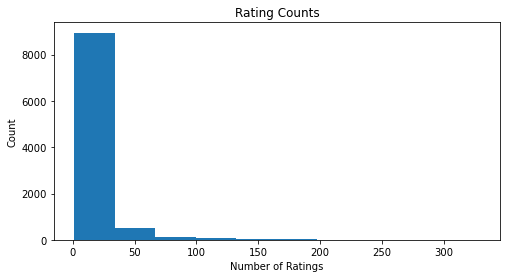

In [105]:
#histogram of rating count
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(movie_ratings[('rating','count')],bins=10)
ax.set_title('Rating Counts')
ax.set_ylabel('Count')
ax.set_xlabel('Number of Ratings')
plt.show()

It looks like if we limit the movies for the survey to any movie that has more than 25 ratings we will have a good number of movies that the user has possibly seen and that enough other people have rated.

In [106]:
survey_movies = movie_ratings[movie_ratings[('rating','count')]>25]
survey_movies

rating      
                                                 mean count
movieId title                                              
1       Toy Story (1995)                     3.920930   215
2       Jumanji (1995)                       3.431818   110
3       Grumpier Old Men (1995)              3.259615    52
5       Father of the Bride Part II (1995)   3.071429    49
6       Heat (1995)                          3.946078   102
...                                               ...   ...
139385  The Revenant (2015)                  3.903226    31
148626  Big Short, The (2015)                3.961538    26
152081  Zootopia (2016)                      3.890625    32
164179  Arrival (2016)                       3.980769    26
166528  Rogue One: A Star Wars Story (2016)  3.925926    27

[1012 rows x 2 columns]

1012 movies will be included in our user rating survey.

## Create User - Rating Matrix

We will create a matrix that has users and columns for each movie with that user ratings. This will be a very large sparse matrix. -- lots of zeros...

use df  and pivot userId,movieId,rating

In [109]:
##create matrix from 
model_matrix = df.pivot(index='userId',columns='movieId',values='rating').fillna(0)
model_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Obtain New User Ratings

We will create a function to obtain new user ratings.  We will want to gather at least 5 ratings in order to make reccomendations from our model.  The user will be given movies to rate on a scale of 0.5 to 5.  They should have the option to skip a movie if they have not seen it.  

use survey_movies dataframe for this function.

In [107]:
def new_user_rating():
        
    return new_ratings